### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [0]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [0]:
tf.__version__

'1.14.0'

### Collect Data

In [0]:
import keras

In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [0]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainYO = trainY
testYO = testY
trainY = tf.keras.utils.to_categorical(
    trainY,
    num_classes=None,
    dtype='float32'
)

testY = tf.keras.utils.to_categorical(
    testY,
    num_classes=None,
    dtype='float32'
)

In [0]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
First 5 examples now are:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

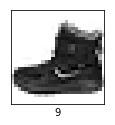

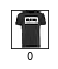

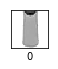

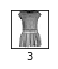

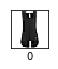

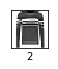

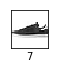

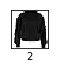

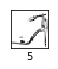

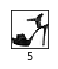

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(trainX[i], cmap=plt.cm.binary)
  plt.xlabel(trainYO[i])
  plt.grid(False)
  plt.show()
 

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax,name='output')
    
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model using model.fit()

In [0]:
# trainX = trainX / 255.0

# test_images = test_images / 255.0

model.fit(trainX, trainY, epochs=5)

W0728 09:37:21.783292 140130481153920 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0728 09:37:21.812405 140130481153920 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5076 - acc: 0.0999
Epoch 2/5
60000/60000 [==============================] - 4s 62us/step - loss: 14.5063 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 62us/step - loss: 14.5063 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 62us/step - loss: 14.5063 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 14.5063 - acc: 0.1000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
# from sklearn.preprocessing import Normalizer
# from keras.models import Sequential, Model
# from keras.layers.normalization import BatchNormalization
# from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, regularizers
# from keras.optimizers import SGD

# # instantiate model
# model = Sequential()

# # we can think of this chunk as the input layer
# model.add(Dense(128, input_dim=28, init='uniform'))

# # we can think of this chunk as the hidden layer    
# model.add(Dense(128, init='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.5))

# # we can think of this chunk as the output layer
# model.add(Dense(10, init='uniform'))
# model.add(BatchNormalization())
# model.add(Activation('softmax'))

# sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
# model.compile(loss='binary_crossentropy', optimizer=sgd)
# model.fit(trainX, trainY, epochs=5)

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.BatchNormalization(),    
        keras.layers.Dense(128, activation=tf.nn.relu),
        keras.layers.Dense(10, activation=tf.nn.softmax,name='output')
    
])
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Execute the model

In [0]:
trainX = trainX / 255.0
trainY = trainY / 255.0
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 119us/step - loss: 0.0648 - acc: 0.0999
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 8.9252e-04 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 6s 106us/step - loss: 4.6105e-04 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 6s 105us/step - loss: 3.0516e-04 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 6s 105us/step - loss: 2.2563e-04 - acc: 0.1000


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 1.8005e-05 - acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 7s 116us/step - loss: 3.9468e-06 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 7s 117us/step - loss: 2.2503e-06 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 7s 119us/step - loss: 1.5593e-06 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 7s 124us/step - loss: 1.2802e-06 - acc: 0.1000


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.BatchNormalization(),    
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(100, activation=tf.nn.sigmoid),
        keras.layers.Dense(10, activation=tf.nn.softmax,name='output')
    
])


In [0]:
sgd = SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 116us/step - loss: 0.0017 - acc: 0.0999
Epoch 2/5
60000/60000 [==============================] - 6s 101us/step - loss: 9.5367e-07 - acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 6s 101us/step - loss: 9.5367e-07 - acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 6s 104us/step - loss: 9.5367e-07 - acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 6s 104us/step - loss: 9.5367e-07 - acc: 0.1000


## Review model

In [0]:
testX = testX / 255.0
testY = testY / 255.0

# test_loss, test_acc = # test_loss, test_acc = model.evaluate(testX, testY)
score = model.evaluate(testX, testY)

print('Test accuracy:', score)

10000/10000 [==============================] - 0s 42us/step
Test accuracy: [9.536738616588991e-07, 0.1]


### Run the model